# Estimate effective sample size

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls -lh /datadrive/tigge/32km/total_precipitation/

total 421M
-rw-r--r-- 1 stephan root 35M Dec 22 12:57 2019-10.nc
-rw-r--r-- 1 stephan root 33M Dec 22 12:57 2019-11.nc
-rw-r--r-- 1 stephan root 35M Dec 22 12:58 2019-12.nc
-rw-r--r-- 1 stephan root 35M Dec 22 12:58 2020-01.nc
-rw-r--r-- 1 stephan root 32M Dec 22 12:58 2020-02.nc
-rw-r--r-- 1 stephan root 35M Dec 22 12:58 2020-03.nc
-rw-r--r-- 1 stephan root 33M Dec 22 12:58 2020-04.nc
-rw-r--r-- 1 stephan root 35M Dec 22 12:59 2020-05.nc
-rw-r--r-- 1 stephan root 33M Dec 22 12:59 2020-06.nc
-rw-r--r-- 1 stephan root 35M Dec 22 12:59 2020-07.nc
-rw-r--r-- 1 stephan root 35M Dec 22 12:59 2020-08.nc
-rw-r--r-- 1 stephan root 33M Dec 22 12:59 2020-09.nc
-rw-r--r-- 1 stephan root 19M Dec 22 12:59 2020-10.nc


In [10]:
tp = xr.open_mfdataset('/datadrive/tigge/32km/total_precipitation/*.nc').tp

In [11]:
tp = tp.diff('lead_time').isel(lead_time=0)

Matplotlib is building the font cache; this may take a moment.


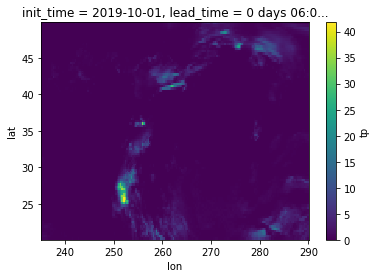

In [16]:
tp.isel(init_time=0).plot()

In [17]:
512/32

16.0

In [21]:
tp_coarse = tp.coarsen(lat=16, lon=16, boundary='trim').mean()

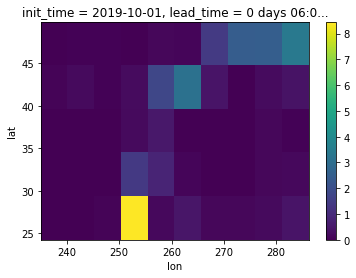

In [23]:
tp_coarse.isel(init_time=0).plot()

In [26]:
tp_coarse.max().values

array(22.447239, dtype=float32)

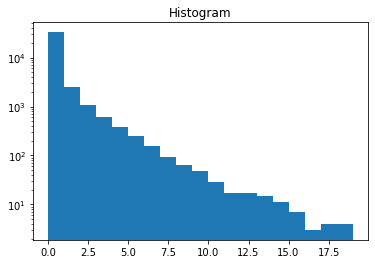

In [36]:
tp_coarse.plot(bins=np.arange(0, 20, 1));
plt.yscale('log')

In [39]:
(tp_coarse > 1.).sum().values

array(5288)

## Balance classes

Idea: Every precipitation amount appears with roughly the same frequency.